---
# *Logistic Regression*
---

 1. ***Logistic Regression : 로지스틱 회귀***
 2. ***nn.Module***
 3. ***class***

In [10]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## ***1. Logistic Regression***

### &nbsp; &nbsp; ***`SIGMOID`***

 > *입력값이 커질수록 1에 수렴하고 작아질수록 0에 수렴*

In [2]:
# 시그모이드 함수 정의
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

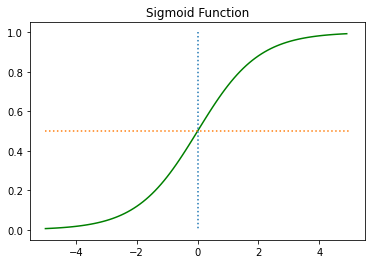

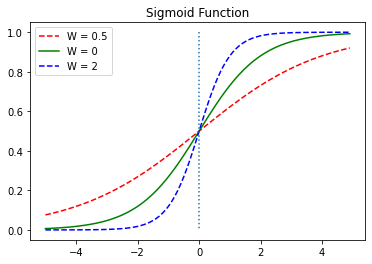

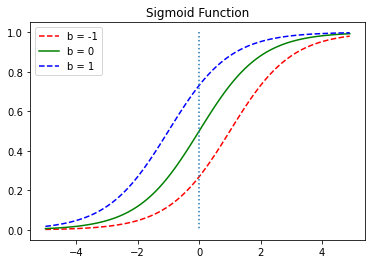

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.plot([-5.0,5.0],[0.5,0.5], ':')
plt.title('Sigmoid Function')
plt.show()


x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--', label='W = 0.5') # W의 값이 0.5일때
plt.plot(x, y2, 'g', label='W = 0') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--', label='W = 2') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.legend()
plt.show()


x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x-1)
y2 = sigmoid(x)
y3 = sigmoid(x+1)

plt.plot(x, y1, 'r', linestyle='--', label='b = -1') # x + 0.5
plt.plot(x, y2, 'g', label='b = 0') # x + 1
plt.plot(x, y3, 'b', linestyle='--', label='b = 1') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.legend()
plt.show()

### &nbsp; &nbsp; ***`COST FUNCTION`***

 - *선형 회귀의 비용 함수 미분 그래프*  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; *로지스틱 회귀의 비용 함수 미분 그래프* <br>
<img src='https://wikidocs.net/images/page/21670/%EC%A0%91%EC%84%A0%EC%9D%98%EA%B8%B0%EC%9A%B8%EA%B8%B01.PNG'> &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
<img src='https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%BB%AC%EB%AF%B8%EB%8B%88%EB%A9%88.PNG'> <br> <br>
***if y=1→cost(H(x),y)=−log(H(x))*** <br>
***if y=0→cost(H(x),y)=−log(1−H(x))*** <br>
***cost(H(x),y)=−[ylogH(x)+(1−y)log(1−H(x))]*** <br>
***cost(W)=−1n∑i=1n[y(i)logH(x(i))+(1−y(i))log(1−H(x(i)))]*** <br>
***W:=W−α∂∂Wcost(W)***

In [17]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train.shape)
print(y_train.shape)

W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

# hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
hypothesis = torch.sigmoid(x_train.matmul(W) + b)


# cost = − [ ylogH(x) + (1−y)log(1−H(x))]
# 하나의 원소에 대한 비용함수
print(- (y_train[0] * torch.log(hypothesis[0]) + 
      (1 - y_train[0]) * torch.log(1 - hypothesis[0])))

# 모든 원소에 대한 비용함수
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)
cost = losses.mean()
print(cost)

# 파이토치에서 제공하는 비용 함수 
F.binary_cross_entropy(hypothesis, y_train)

torch.Size([6, 2])
torch.Size([6, 1])
tensor([0.6931], grad_fn=<NegBackward>)
tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)
tensor(0.6931, grad_fn=<MeanBackward0>)


tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [18]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
#     cost = -(y_train * torch.log(hypothesis) + 
#              (1 - y_train) * torch.log(1 - hypothesis)).mean()
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 200 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()))
        
# test
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)
print(W)
print(b)

Epoch    0/1000 Cost: 0.693147
Epoch  200/1000 Cost: 0.080643
Epoch  400/1000 Cost: 0.045300
Epoch  600/1000 Cost: 0.031672
Epoch  800/1000 Cost: 0.024394
Epoch 1000/1000 Cost: 0.019852
tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


## ***2. nn.Module***

In [34]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

'''
model과 동일한 결과 출력
for i in x_data:
    x = (i[0] * 0.6692) + (i[1] * -0.4555) - 0.4209
    y = 1 / (1 + np.exp(-x))
    print(y)
'''

print(model(x_train))
list(model.parameters())

tensor([[0.1428],
        [0.0508],
        [0.1178],
        [0.0212],
        [0.0136],
        [0.0171]], grad_fn=<SigmoidBackward>)


[Parameter containing:
 tensor([[-0.4522, -0.6832]], requires_grad=True),
 Parameter containing:
 tensor([0.0259], requires_grad=True)]

In [35]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 2.092384 Accuracy 50.00%
Epoch  100/1000 Cost: 0.137197 Accuracy 100.00%
Epoch  200/1000 Cost: 0.081501 Accuracy 100.00%
Epoch  300/1000 Cost: 0.058333 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045561 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037437 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031799 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027651 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024469 Accuracy 100.00%
Epoch  900/1000 Cost: 0.021948 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019901 Accuracy 100.00%


## ***3. Class***

In [42]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [43]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = BinaryClassifier()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.666438 Accuracy 50.00%
Epoch  100/1000 Cost: 0.132670 Accuracy 100.00%
Epoch  200/1000 Cost: 0.079922 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057534 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045077 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037111 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031565 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027475 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024331 Accuracy 100.00%
Epoch  900/1000 Cost: 0.021837 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019810 Accuracy 100.00%
